# Predicting Diabetes Using the Pima Indians Diabetes Dataset and Machine Learning Models

# Data Science Problem

This project aims to build a predictive model for diabetes based on patients' clinical and demographic information. This model will provide clinicians with a machine learning tool to make more accurate diabetes diagnoses and plan for future diabetes cases.

# Diabetes Background 

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.
If you have diabetes, your body either doesn’t make enough insulin or can’t use the insulin it makes as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.
There isn’t a cure yet for diabetes, but losing weight, eating healthy food, and being active can really help. Taking medicine as needed, getting diabetes self-management education and support, and keeping health care appointments can also reduce the impact of diabetes on your life. Therefore, there is still a great need to have access to machine learning models that can improve diabetes diagnosis. 

# Data Sciece Problem Solution Approach

Using the Pima Indian diabetes dataset and machine learning, we aim to Build a model that predict diabetes with high accuracy. 

# Data Description Summary

The Pima Indian diabetes dataset is originally from the National Institute of 
Diabetes and Digestive and Kidney Diseases. This data has been widely use in many classification studies 
to find a machine learning model whose classification algorithm can predict with high accuracy whether a patient will receive a 
non-diabetic or diabetic diagnosis based on the patient's clinical and demographic information. 

The Pima Indians diabetes dataset contains nine columns eight predictive variables and the outcome label variable for each of n=768 diabetes patients.

- Column 1. Pregnancies: Number of times pregnant
- Column 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Column 3. BloodPressure: Diastolic blood pressure (mm Hg)
- Column 4. SkinThickness: riceps skin fold thickness (mm)
- Column 5. Insulin: 2-Hour serum insulin (mu U/ml)
- Column 6. BMI: Body mass index (weight in kg/(height in m)^2)
- Column 7. DiabetesPedigreeFunction: Diabetes pedigree function
- Column 8. Age: Age (years)
- Column 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# To switch to seaborn defaults, simply call the set_theme() function.
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from scipy import stats
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.model_selection import StratifiedKFold, learning_curve

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectFromModel

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline, Pipeline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import traceback
import re # regular expression operations
import string
import warnings

# Libraries to save best model
import pickle
from sklearn import __version__ as sklearn_version
import datetime

# Exploratory data Analysis

## Data Loading

In [2]:
# Load the raw data
diabetes = pd.read_csv('raw_data/pima_indians_diabetes.csv', header = None)
diabetes.head()                     

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Rename columns 
colnames = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes.columns = colnames
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Get data information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check for null values
missing = pd.concat([diabetes.isnull().sum(), 100 * diabetes.isnull().mean()], axis=1)
missing.columns=['count' , '%']
missing

,count,%
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BodyMassIndex,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [6]:
# Indentify unique outcome label values
diabetes['Outcome'].unique()

array([1, 0], dtype=int64)

In [7]:
# Data statistical summary
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Plot variables distributions

In [8]:
# Define diagnostic classes
class_1 = 'non-diabetic'
class_2 = 'diabetic'

### Number of non-diabetic and diabetic people

In [9]:
df_diagnosis = pd.DataFrame.from_dict({'Diagnosis': [class_1, class_2]})
df_diagnosis['Count'] = diabetes['Outcome'].value_counts().values
df_diagnosis['%Count'] = round(df_diagnosis['Count']/diabetes.shape[0], 2)
df_diagnosis

,Diagnosis,Count,%Count
0,non-diabetic,500,0.65
1,diabetic,268,0.35


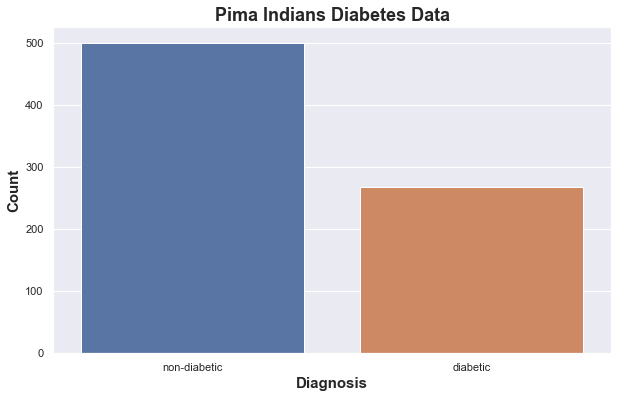

In [10]:
def percent_annotation(plot, feature):
    ''' This function inclues precentage values in bar plots'''
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 16)
    plt.show()

# Plot diagnosis counts
plt.figure(figsize=(10,6))
x = 'Diagnosis'
y= 'Count'
ax = sns.barplot(x=x, y = y, data=df_diagnosis)
plt.xlabel(x, fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')
#percent_annotation(ax, diabetes['Outcome'])

figname = 'figures/' + x + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')
plt.show();

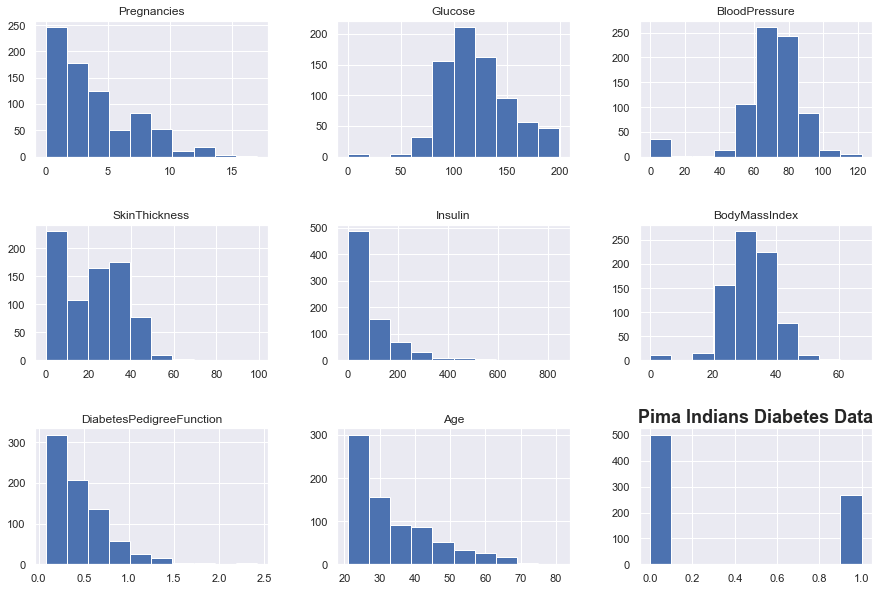

In [11]:
# Plot diabetes variables distributions
diabetes.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')
figname = 'figures/VariablesDistributions.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

In [12]:
# Make a dataframe with diabetes data plus diagnostic labels
df_diabetes = diabetes.copy()
df_diabetes['Diagnosis'] = diabetes.Outcome.replace({0: class_1, 1: class_2})

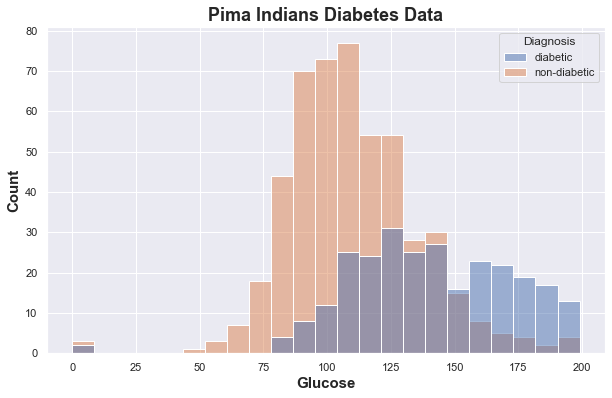

In [13]:
plt.figure(figsize=(10,6))
x = 'Glucose'
hue = 'Diagnosis'
sns.histplot(x=x, hue=hue, data=df_diabetes)
plt.xlabel(x, fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + x + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

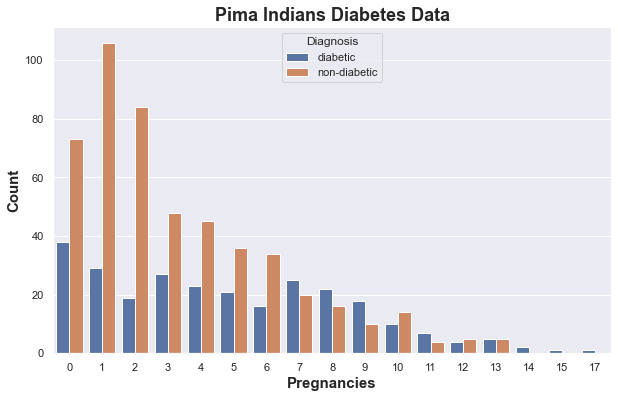

In [14]:
plt.figure(figsize=(10,6))
x = 'Pregnancies'
hue = 'Diagnosis'
sns.countplot(x=x, hue=hue, data=df_diabetes)
plt.xlabel(x, fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + x + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

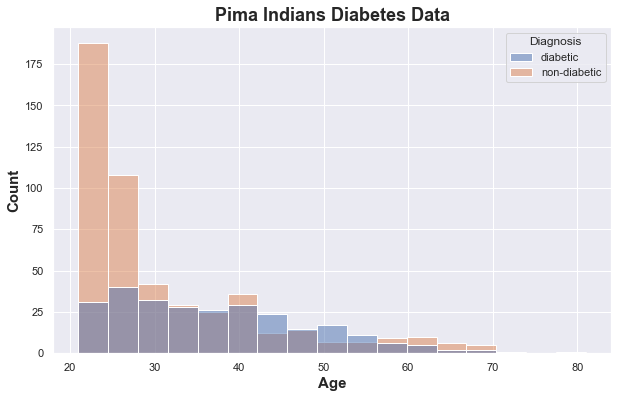

In [15]:
plt.figure(figsize=(10,6))
x = 'Age'
hue = 'Diagnosis'
sns.histplot(x=x, hue=hue, data=df_diabetes)
plt.xlabel(x, fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + x + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

<Figure size 720x432 with 0 Axes>

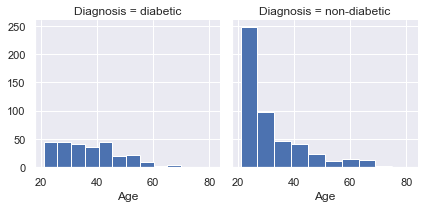

In [16]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(data=df_diabetes, col='Diagnosis')
g.map(plt.hist,'Age');

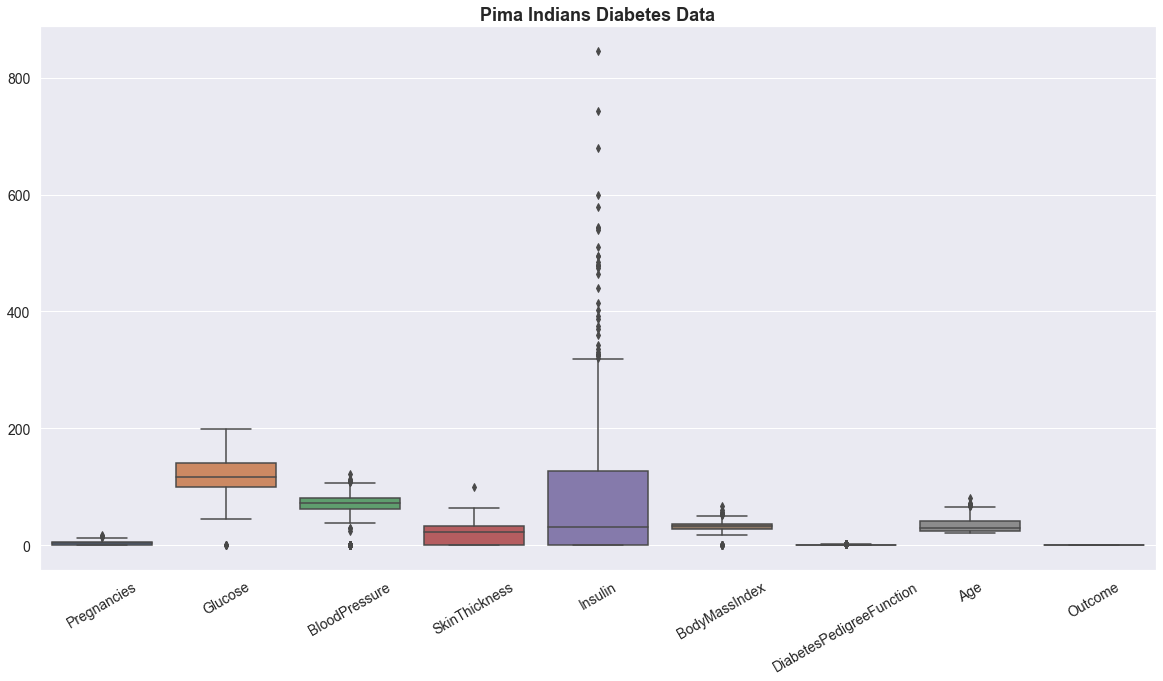

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_diabetes)
plt.xticks(rotation=30, size=14)
plt.yticks(size=14)
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + 'VariablesBoxPlots' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

In [18]:
df = df_diabetes.drop(columns =['Outcome'])
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,diabetic
1,1,85,66,29,0,26.6,0.351,31,non-diabetic


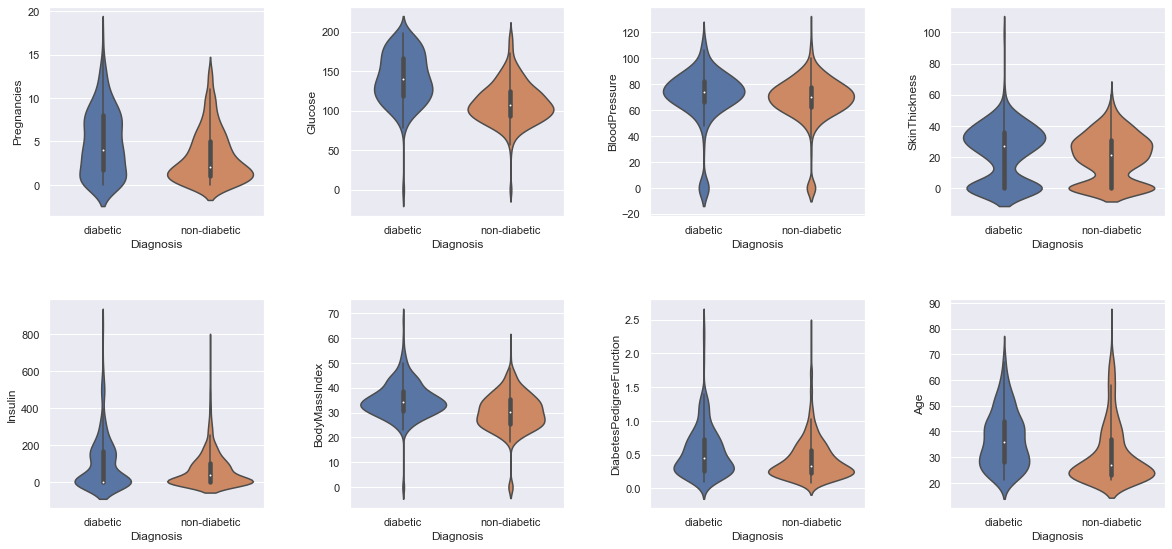

In [19]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df.columns):
    if column == 'Diagnosis':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Diagnosis', y=column, data=df)
    plt.subplots_adjust(hspace=0.4)
    plt.subplots_adjust(wspace=0.4)

#plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')    
savename = 'Violin' + 'DiagnosisDistributions' 
figname = 'figures/' + savename + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')    

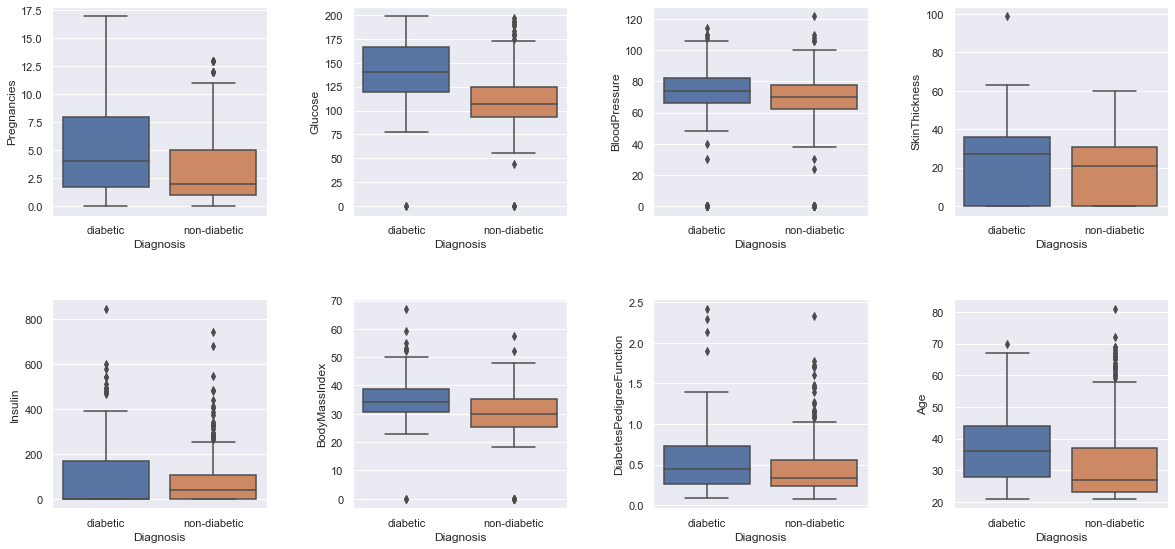

In [20]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df.columns):
    if column == 'Diagnosis':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='Diagnosis', y=column, data=df)
    plt.subplots_adjust(hspace=0.4)
    plt.subplots_adjust(wspace=0.4)    

savename = 'Boxplot' + 'DiagnosisDistributions' 
figname = 'figures/' + savename + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')    

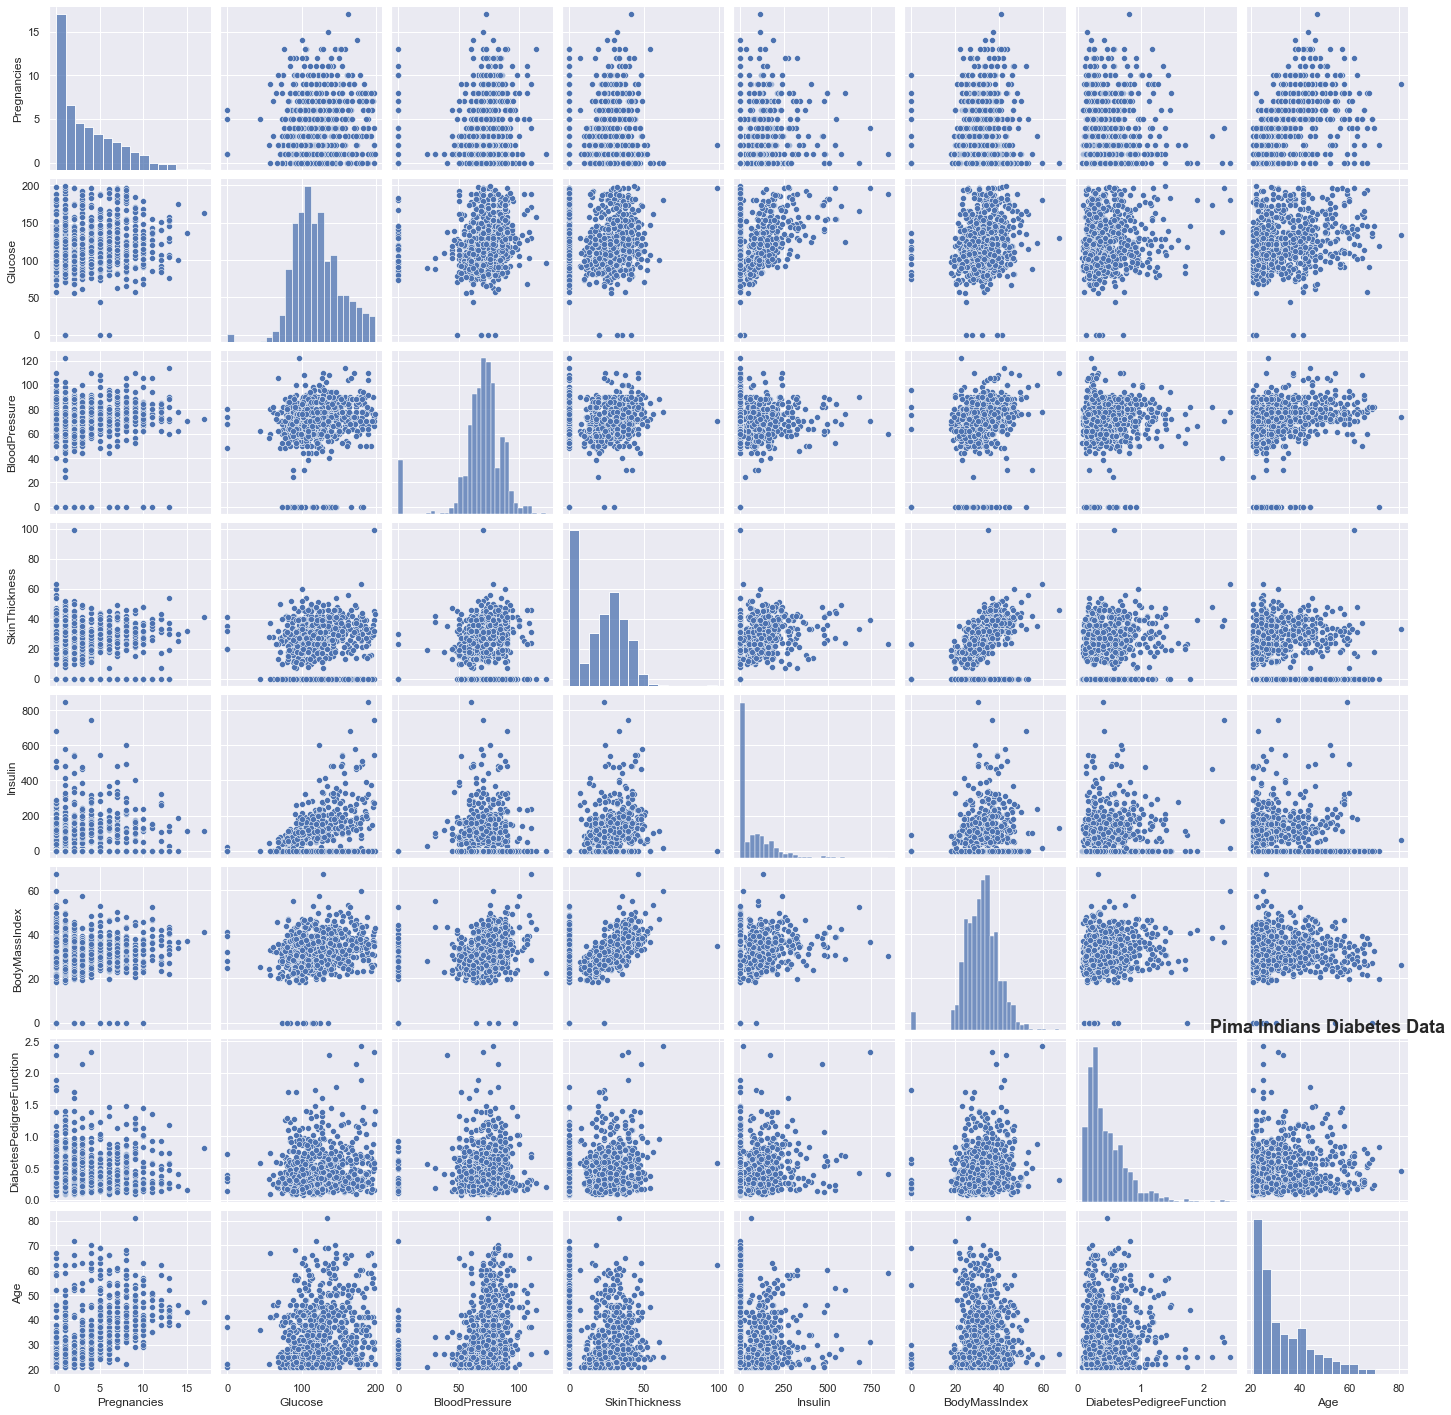

In [21]:
colsname = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BodyMassIndex','DiabetesPedigreeFunction','Age']

sns.pairplot(diabetes[colsname], height=2.5);
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + 'PairplotDiabetes' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


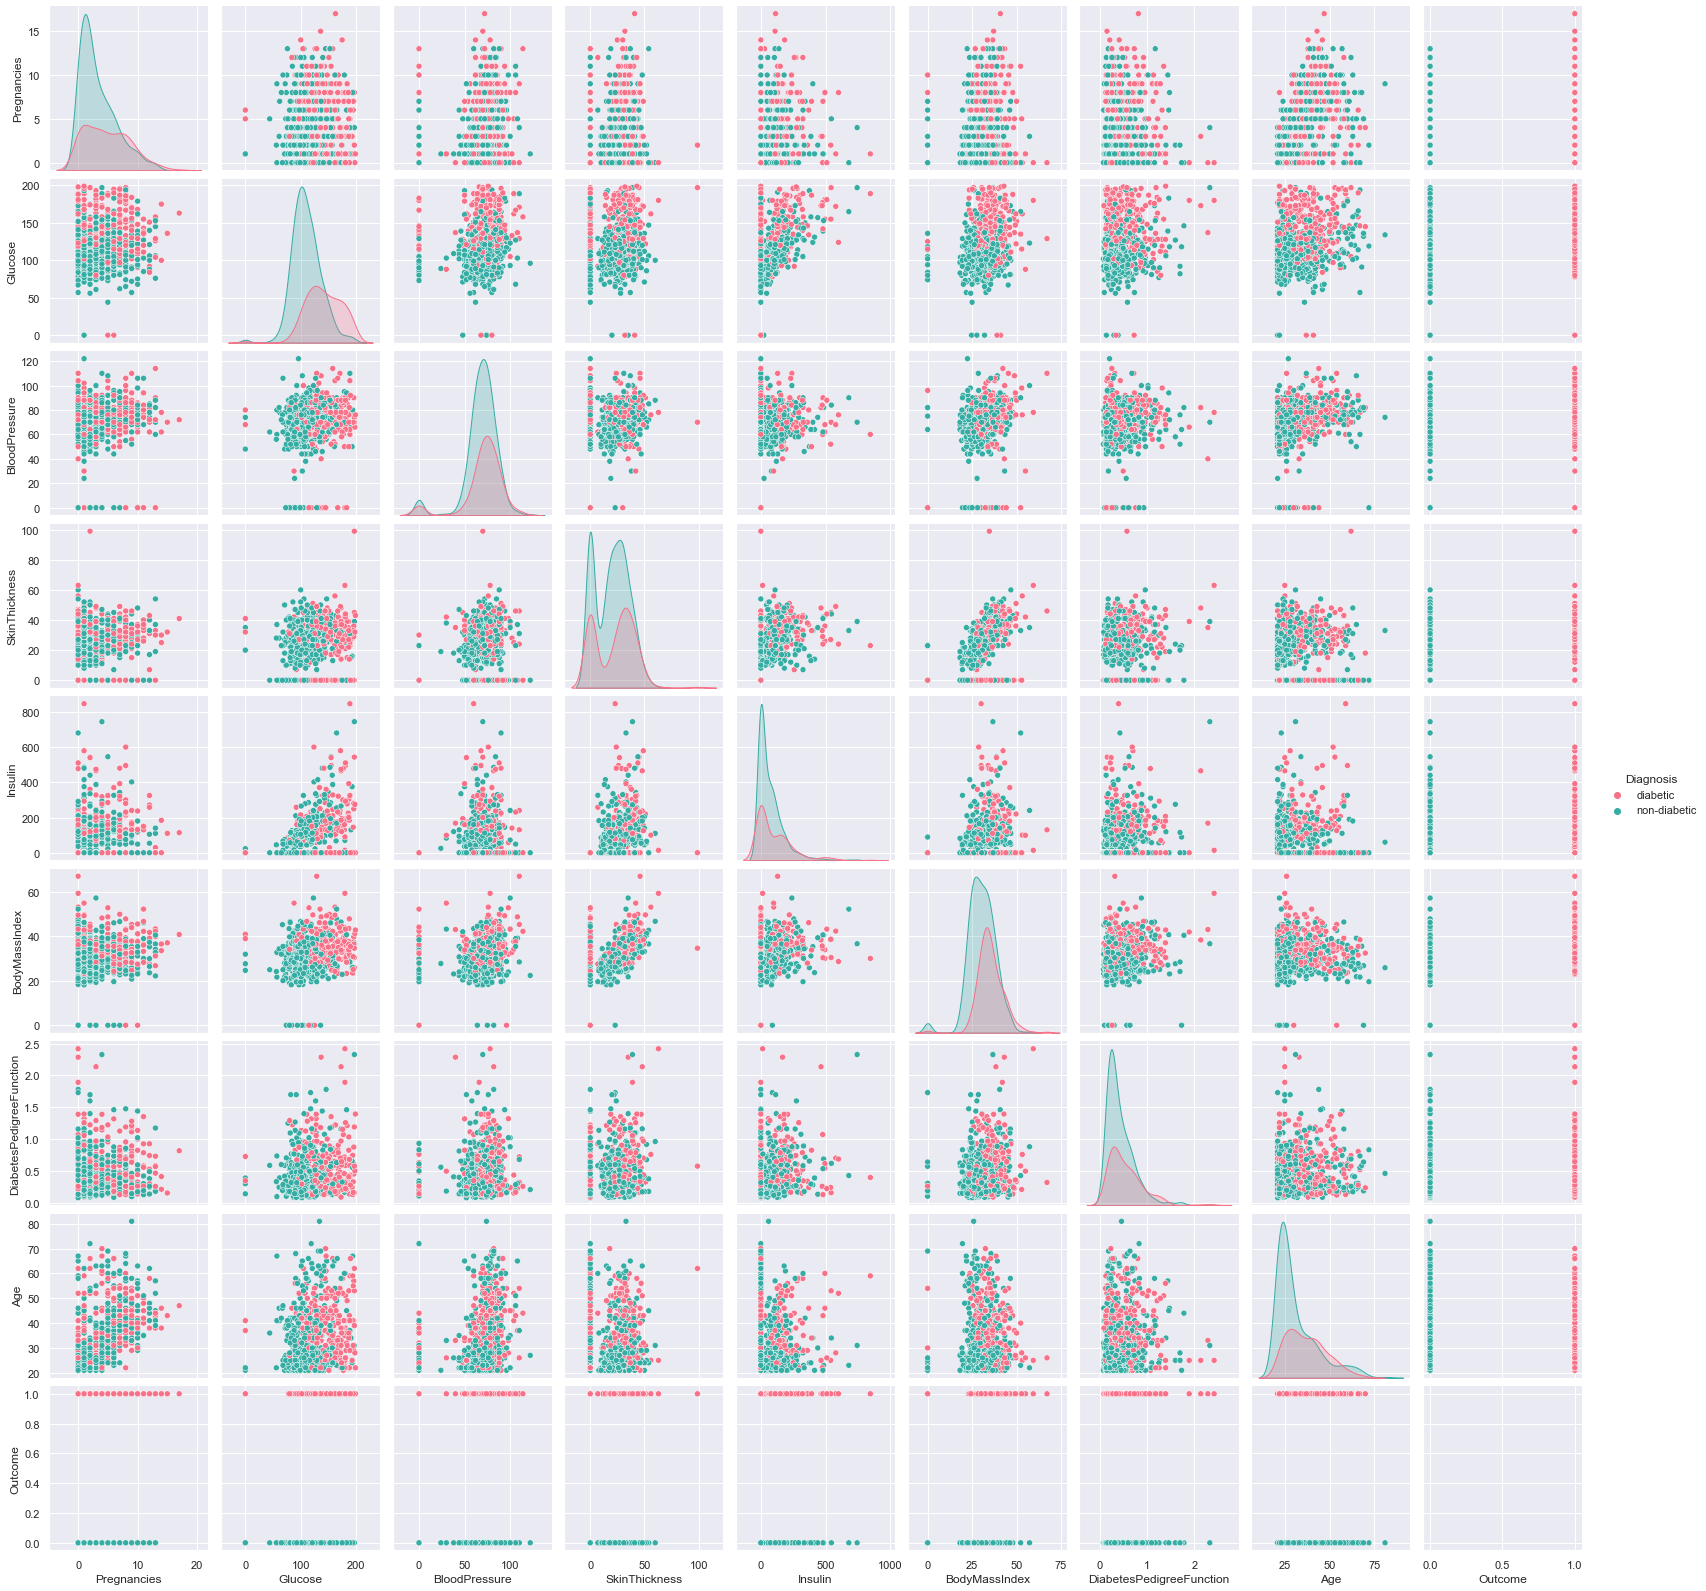

In [22]:
sns.pairplot(df_diabetes, hue='Diagnosis', palette="husl")
figname = 'figures/' + 'PairplotDiabetesClasses' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')    

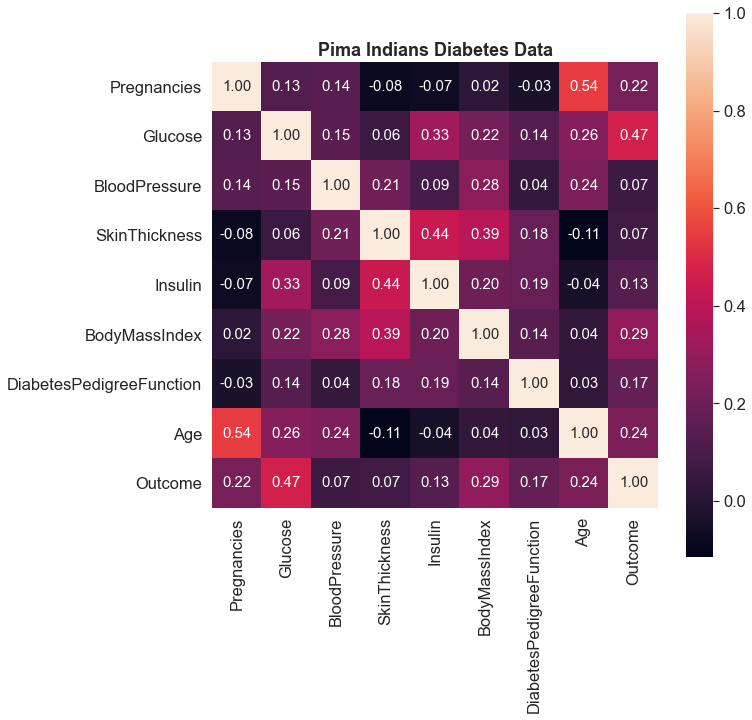

In [23]:
# Plot heat map of correlations between all numeric variables
data = diabetes
cm = np.corrcoef(data.values.T)

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                 yticklabels=data.columns, xticklabels=data.columns)
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + 'VariablesCorrelations' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')  

In the above heatmap, brighter colors indicate more positive correlation, while darker colors indicate more negative correlation. Therefore, as we can notice from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant positive correlation with the outcome variable. It can be also observe significant correlation between other pairs of features, like age and pregnancies, and between insulin and skin thickness.

## Visualizing the High-dimensional Data

In [24]:
df_subset = pd.DataFrame({'Diagnosis': df_diabetes.Diagnosis})

n_components = 2
pca = PCA(n_components = n_components)
pca_result = pca.fit_transform(diabetes.drop(['Outcome'], axis=1).values)
df_subset['PCA-1'] = pca_result[:,0]
df_subset['PCA-2'] = pca_result[:,1] 
print(df_subset.head(3))

print('\nExplained variation for each of the {} principal components: {}'.format(n_components, pca.explained_variance_ratio_))
print('Cumulative explained variation for {} principal components: {}'.format(n_components, np.sum(pca.explained_variance_ratio_)))

      Diagnosis      PCA-1      PCA-2
0      diabetic -75.714655 -35.950783
1  non-diabetic -82.358268  28.908213
2      diabetic -74.630643 -67.906496

Explained variation for each of the 2 principal components: [0.88854663 0.06159078]
Cumulative explained variation for 2 principal components: 0.9501374183215004


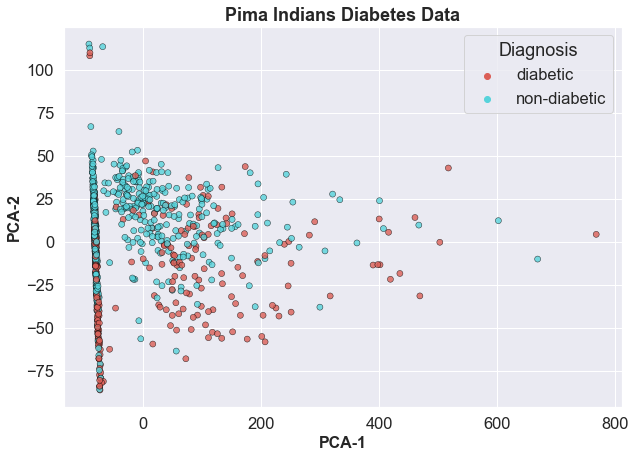

In [25]:
plt.figure(figsize=(10,7))

sns.scatterplot(data=df_subset,
    x="PCA-1", y="PCA-2",
    hue="Diagnosis",
    palette=sns.color_palette("hls", 2), edgecolor="black",
    legend="full",
    alpha=0.8)
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')
plt.xlabel('PCA-1', fontsize=16, fontweight='bold')
plt.ylabel('PCA-2', fontsize=16, fontweight='bold');

figname = 'figures/' + 'PCA_ReductionVisualization' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')  

## Data Scaling/Normalization

In [26]:
sc = StandardScaler()
scaled_data = sc.fit_transform(diabetes.drop(['Outcome'], axis=1))

cnames = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age']

diabetes_scaled = pd.DataFrame(scaled_data, columns = cnames)
diabetes_scaled['Outcome'] = diabetes['Outcome']
diabetes_scaled.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0


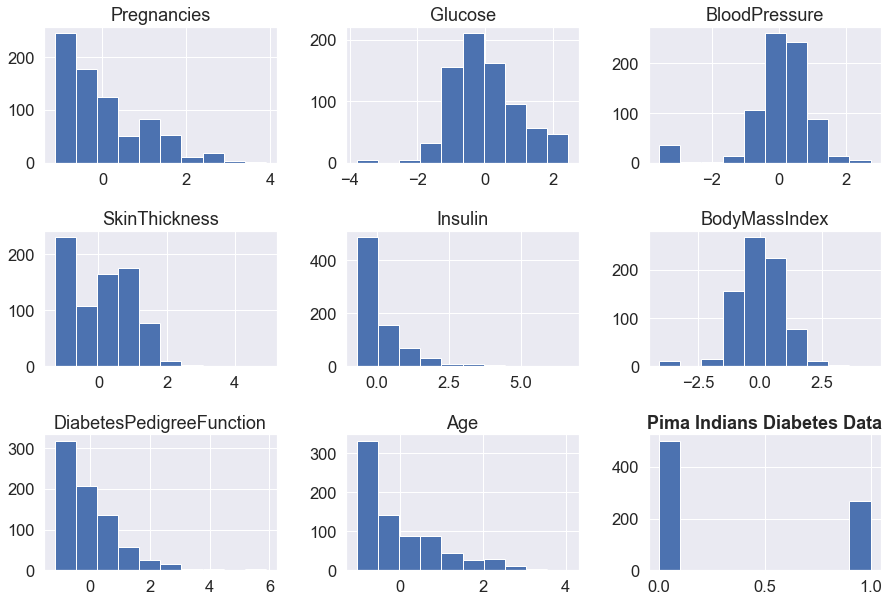

In [27]:
# Plot scaled variables distributions
diabetes_scaled.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')
figname = 'figures/scaledVariblesDistributions.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

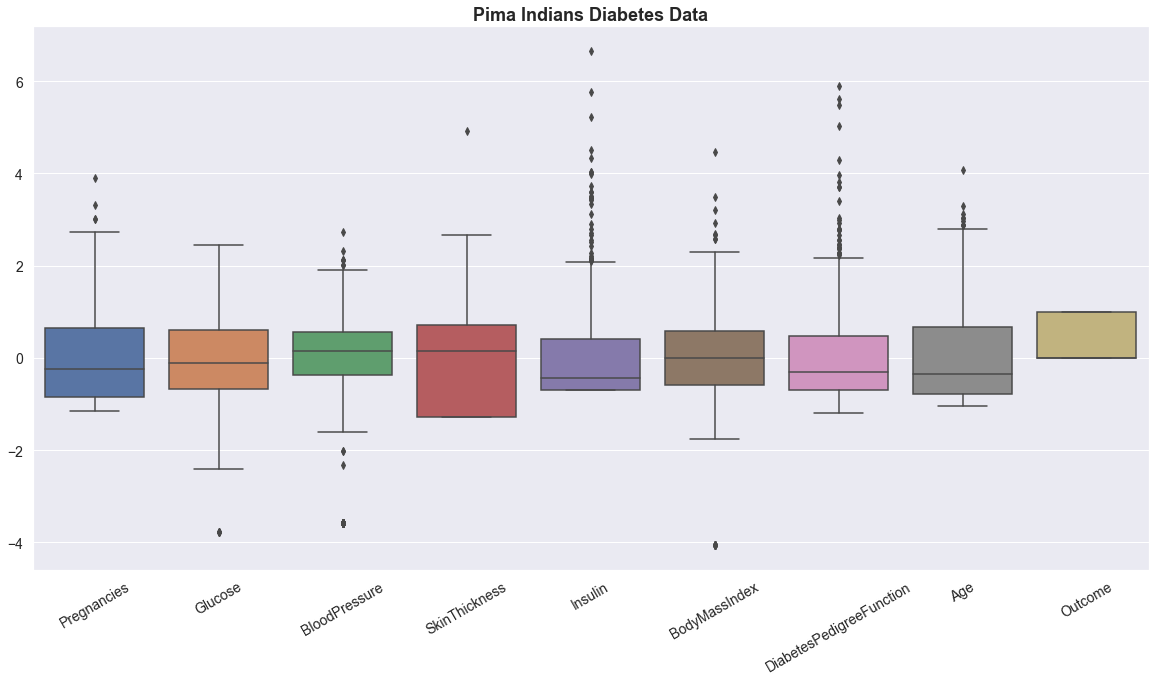

In [28]:
# Plot scaled variables boxplots
plt.figure(figsize=(20,10))
sns.boxplot(data=diabetes_scaled)
plt.xticks(rotation=30, size=14)
plt.yticks(size=14)
plt.title('Pima Indians Diabetes Data', fontsize=18, fontweight='bold')

figname = 'figures/' + 'scaledVariablesBoxPlots' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

# Data Modeling

## Divide Data into Features (X) and Target Labes (y) 

In [29]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

In [30]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [31]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

## Divide Data into Training and Testing Sets

In [32]:
# Split the dataset into training and testing sets with ratio of 80:20 for training and testing respectively. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Show the Training and Testing Data
print('Training and testing sets shapes:')
print('x_train = {}, x_test = {}, y_train = {},  y_test = {}'.
      format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Training and testing sets shapes:
x_train = (614, 8), x_test = (154, 8), y_train = (614,),  y_test = (154,)


## Data Scaling/Normalization

Before using machine learning, we normalize the feature variables. Machine Learning models often benefit substantially from input normalization. It also makes it easier to understand the importance of each feature when looking at the model weights. We normalize the data such that each variable has 0 mean and standard deviation of 1.

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(np.mean(X_train, axis=0)) #check that new means equal 0
print(np.std(X_train, axis=0)) #check that new stds equal 1

[-6.94341436e-17  1.73585359e-16 -2.09748975e-16 -3.47170718e-17
 -1.59119912e-17  1.35975198e-16  2.19874788e-16 -1.08490849e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]


## Herper Functions

In [34]:
def model_fit_predict(model, X_train, X_test, y_train, y_test):
    
    print('Classifier:', model)

    # Train the model 
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_pred = model.predict(X_test)
    
    accuracy = model.score(X_test, y_test)
    print("accuracy = {:.2f}%".format(accuracy * 100))
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    #dict_metric_scores = model_metric_scores(y_test, y_pred)
    classReport_confusionMatrix(y_test, y_pred)
        
    # Calculate accuraccy scores 
    return(train_score, test_score)

In [35]:
def classReport_confusionMatrix(y_test, y_pred):
    
    # Compute and print classification report 
    classification_Report = classification_report(y_test, y_pred)
    print('\nClassification report: \n', classification_Report)
    
    # Compute and print consfusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Build the confusion matrix plot
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Oranges, linewidths=0.2)

    # Add labels to the plot
    class_names = [class_1+' (0)', class_2+' (1)']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')
    plt.ylabel('True label', fontsize=14, fontweight='bold')
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.show();

In [36]:
def classification_models(models, models_name, X_train, X_test, y_train, y_test):
    ''' This function evaluates all selected classification models'''
    
    df_train_test_scores = pd.DataFrame.from_dict({'Model': models_name})
    
    trainScore = []
    testScore = []
    
    for k, classifier in enumerate(models):
               
        # Train and test model. Then, compute metric scores 
        train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)
        
        trainScore.append(round(train_score, 2))
        testScore.append(round(test_score,2))
        
    df_train_test_scores['Train-Score'] = trainScore
    df_train_test_scores['Test-Score'] = testScore
    
    return(df_train_test_scores)

## Machine Learning Classification Models

Next, train, test, and evaluate selected classification models. 

## Logistic Regression

Classifier: LogisticRegression()
accuracy = 71.43%

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



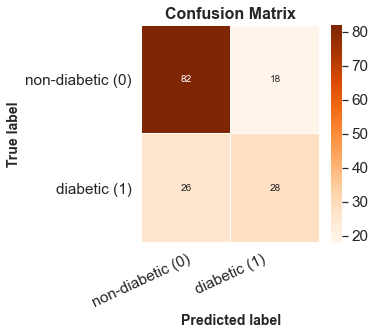

In [37]:
classifier = LogisticRegression()
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

## Support Vector Machine (SVM)

### SVM_rbf

Classifier: SVC()
accuracy = 75.32%

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



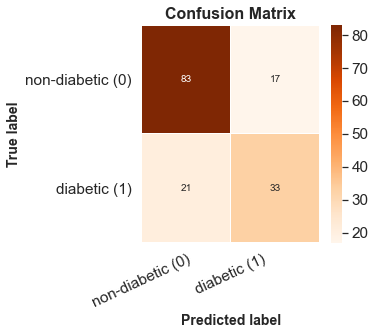

In [38]:
# SVM-rbf
classifier = SVC()
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

### SVM_Linear

Classifier: LinearSVC()
accuracy = 71.43%

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


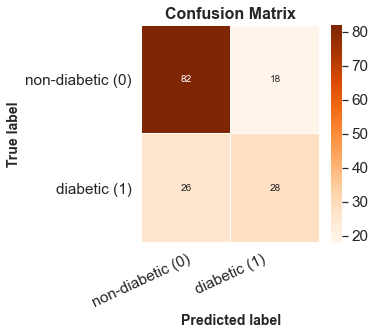

In [39]:
# Linear-SVM
classifier = LinearSVC() # The linear kernel is good when there is a lot features.
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

### Random Forest

Classifier: RandomForestClassifier()
accuracy = 74.68%

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



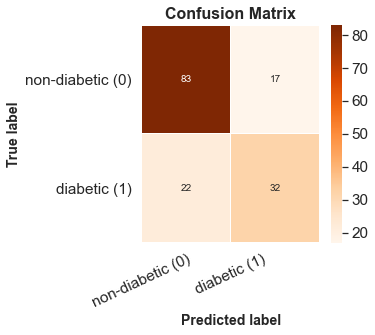

In [40]:
classifier = RandomForestClassifier()
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

### K-Nearest-Neighbors

Classifier: KNeighborsClassifier()
accuracy = 70.13%

Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



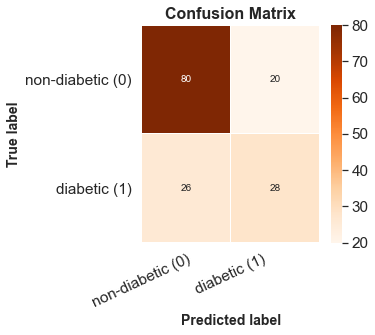

In [41]:
# K-Nearest-Neighbors
classifier  = KNeighborsClassifier()
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

### Naive Bayes

Classifier: GaussianNB()
accuracy = 70.78%

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



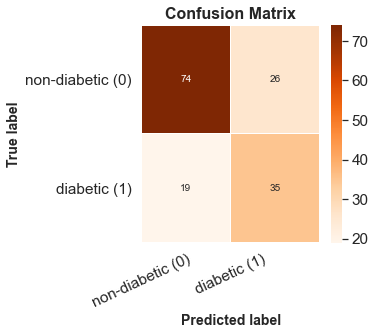

In [42]:
# Naive-Bayes
classifier = GaussianNB()
train_score, test_score = model_fit_predict(classifier, X_train, X_test, y_train, y_test)

### Model Selection Summary: 

We applied six machine learning algorithms to find the best classification model for the Pima Indian Diabetes data. Random Forest and SVM_rbf provide the higher accuracy of 77% and 75%. 

## Grid Search with Cross Validation

Random search allows narrowing down the range for each hyperparameter and we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

### Random Forest

In [43]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print('grid_search.best_params: ', grid_search.best_params_)

best_grid = grid_search.best_estimator_
print('grid_search.best_estimator: ', best_grid)

best_test_score = round(grid_search.score(X_test, y_test), 2)
print('best_test_score:', best_test_score)

grid_search.best_params:  {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
grid_search.best_estimator:  RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=4,
                       min_samples_split=12)
best_test_score: 0.76


## Features importance and selection

Next, select features which are the most important according to their predictable power.

In [44]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
feature_names = diabetes.drop(['Outcome'], axis=1).columns
print('Feature labes = ', feature_names)

Feature labes =  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


### Identify the Most Important Features

In [46]:
model_name = 'Random Forest'
print('Model: %s' %model_name)
clf = grid_search.best_estimator_

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
df_feature_importance = pd.DataFrame({'Feature Names': feature_names, 
                                     'Feature Importance':clf.feature_importances_})
df_feature_importance.sort_values(by=['Feature Importance'], ascending=False, inplace=True)
df_feature_importance

Model: Random Forest


,Feature Names,Feature Importance
1,Glucose,0.406843
5,BodyMassIndex,0.168543
7,Age,0.121245
6,DiabetesPedigreeFunction,0.096603
0,Pregnancies,0.057411
2,BloodPressure,0.052495
4,Insulin,0.049245
3,SkinThickness,0.047615


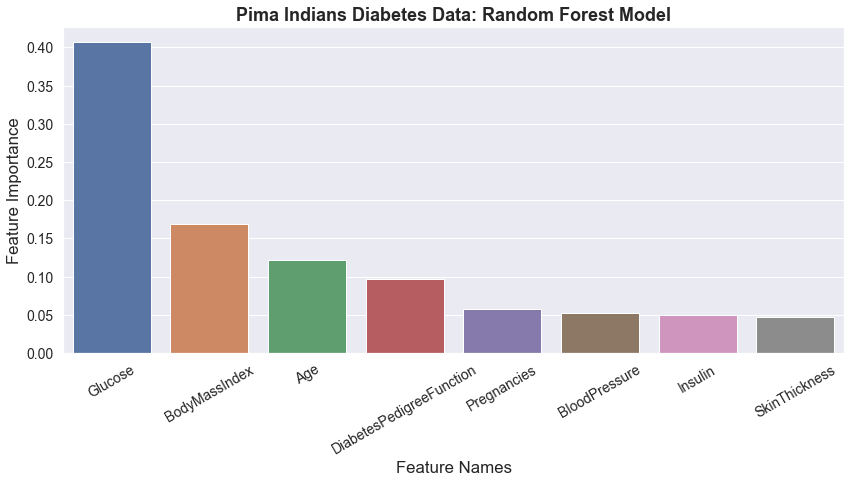

In [47]:
plt.figure(figsize=(14,6))
sns.barplot(x='Feature Names', y='Feature Importance',  data=df_feature_importance)
titlename = 'Pima Indians Diabetes Data: %s Model' % model_name
plt.title(titlename, fontsize=18, fontweight='bold')
plt.xticks(rotation=30, size=14)
plt.yticks(size=14)

figname = 'figures/' + 'FeatureImportance'+ 'RandomForest' + '.png'
plt.savefig(figname, dpi=300, bbox_inches='tight')

### Feature Importance Summary: 
From the feature importance plot, there are two things to note. First, all the importance scores add up to 100%. Second, Glucose and BodyMassIndex, and Age are more important than the other features. 

### Select the Most Important Features

In [48]:
# clf = Random forest, best model obtained from gridsearchCV
clf = grid_search.best_estimator_

feature_names = diabetes.drop(['Outcome'], axis=1).columns

selector = SelectFromModel(estimator=clf).fit(X_train, y_train)
print('Selector: ', selector)

selected_features_boolean_index = selector.get_support()
#selected_features = df_resid_X.columns[selected_features_boolean_index]

# Print the names of the most important features
selected_features= feature_names[(selector.get_support())]
print('\nMost Important Features:', selected_features.tolist())
print('\nNumber of selected features =', len(selected_features))

# Feature selector threshold 
selector_threshold = selector.threshold_
print('\nFeature selector threshold = {:.4f}'.format(selector_threshold))

Selector:  SelectFromModel(estimator=RandomForestClassifier(max_depth=7,
                                                 max_features='log2',
                                                 min_samples_leaf=4,
                                                 min_samples_split=12))

Most Important Features: ['Glucose', 'BodyMassIndex', 'Age']

Number of selected features = 3

Feature selector threshold = 0.1250


### Create a Data Subset with the Most Important Features

In [49]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = selector.transform(X_train)
X_important_test = selector.transform(X_test)

In [50]:
df_X_important_train = pd.DataFrame(X_important_train, columns= selected_features)
df_X_important_train.head(3)

,Glucose,BodyMassIndex,Age
0,-0.980131,-0.607678,-0.792169
1,0.161444,-0.302139,0.561034
2,-0.504474,0.372594,-0.707594


### Train A New Random Forest Classifier Using Only Most Important Features

In [51]:
# Create a new random forest classifier for the most important features
# model = Random forest obteined from gridsearchCV
clf_important = grid_search.best_estimator_

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

# Make prediction on the the test dataset 
y_important_pred = clf_important.predict(X_important_test)

# Compute accuracy using selected features
accuracy_selectedfeatures = accuracy_score(y_test, y_important_pred)
print('{}: accuracy using selected features: {:.2f}%'.format(model_name, accuracy_selectedfeatures*100))

Random Forest: accuracy using selected features: 73.38%


### Compute the Accuracy of the Random Forest Classifier Using all Features

In [52]:
# Apply The Full Featured Classifier To The Test Data
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model accuracy using all features
accuracy_allfeatures = accuracy_score(y_test, y_pred)
print('{}: accuracy using all features: {:.2f}%'.format(model_name, accuracy_allfeatures*100))

Random Forest: accuracy using all features: 75.97%


### Summary: Comparing the Accuracy Of the Full Feature to the Selected Features Classifier

From the obtained results, the Random Forest Classifier trained only with the most important features Glucose, BodyMassIndex, and Age provides better accuracy of 75.32% compare to the accuracy of 74.68% provide by the classifier using all features to train the model.

## Save the Best Classification Model 

In [66]:
best_model = grid_search.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in diabetes.drop(['Outcome'], axis=1).columns]
best_model.build_datetime = datetime.datetime.now()

modelpath = 'models/'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
model_path = os.path.join(modelpath, 'diabetes_classification_bestmodel.pkl')
if not os.path.exists(model_path):
    with open(model_path, 'wb') as f:
        pickle.dump(best_model, f)

In [67]:
## Check that the model was propely save
my_data=pd.read_pickle('models/diabetes_classification_bestmodel.pkl')
print(my_data)

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=4,
                       min_samples_split=12)


## To Load the Best Model

In [68]:
expected_model_version = '1.0'
model_path = 'models/diabetes_classification_bestmodel.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [69]:
model

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=4,
                       min_samples_split=12)